<a href="https://colab.research.google.com/github/zulfijauh/Data-Science/blob/main/House_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset: https://www.kaggle.com/datasets/shree1992/housedata

# Library

In [400]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import scipy.stats
from imblearn.metrics import sensitivity_specificity_support
from sklearn.feature_selection import SelectKBest, f_classif, RFE, SelectFromModel

from imblearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Data Understanding

In [115]:
data = pd.read_csv('https://raw.githubusercontent.com/zulfijauh/Data-Science/main/Dataset/House%20price%20prediction.csv')
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [116]:
# Check null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [117]:
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.600000e+03,4600.000000,4600.000000,4600.000000,4.600000e+03,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000,4600.000000
mean,5.519630e+05,3.400870,2.160815,2139.346957,1.485252e+04,1.512065,0.007174,0.240652,3.451739,1827.265435,312.081522,1970.786304,808.608261
std,5.638347e+05,0.908848,0.783781,963.206916,3.588444e+04,0.538288,0.084404,0.778405,0.677230,862.168977,464.137228,29.731848,979.414536
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.228750e+05,3.000000,1.750000,1460.000000,5.000750e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.609435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.549625e+05,4.000000,2.500000,2620.000000,1.100125e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


In [118]:
data.loc[(data['price'] == 0)].head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
4354,2014-05-05 00:00:00,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962,0,3911 S 328th St,Federal Way,WA 98001,USA
4356,2014-05-05 00:00:00,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960,2001,2120 31st Ave W,Seattle,WA 98199,USA
4357,2014-05-05 00:00:00,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953,1983,12271 Marine View Dr SW,Burien,WA 98146,USA
4358,2014-05-06 00:00:00,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983,0,21809 SE 38th Pl,Issaquah,WA 98075,USA
4361,2014-05-07 00:00:00,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920,0,14901-14999 12th Ave SW,Burien,WA 98166,USA


In [119]:
data.loc[(data['bedrooms'] == 0)]

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
2365,2014-06-12 00:00:00,1095000.0,0.0,0.0,3064,4764,3.5,0,2,3,3064,0,1990,2009,814 E Howe St,Seattle,WA 98102,USA
3209,2014-06-24 00:00:00,1295648.0,0.0,0.0,4810,28008,2.0,0,0,3,4810,0,1990,2009,20418 NE 64th Pl,Redmond,WA 98053,USA


# Data Cleaning

In [120]:
# Create dataframe of missing datapoint by appending price = 0 and bedrooms = 0
missing = data.loc[(data['price'] == 0)].append(data.loc[(data['bedrooms'] == 0)])
# Create list that contains index of error datapoint
missing_index_list = missing.reset_index()['index'].to_list()
# Drop error datapoint
data = data.drop(missing_index_list,axis=0)

In [121]:
#Recheck the values
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.549000e+03,4549.000000,4549.000000,4549.000000,4.549000e+03,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000,4549.000000
mean,5.576257e+05,3.396131,2.155968,2131.578809,1.483460e+04,1.511651,0.006595,0.234337,3.449549,1821.291932,310.286876,1970.787206,808.036272
std,5.638915e+05,0.901988,0.775205,955.234941,3.597114e+04,0.537794,0.080949,0.765085,0.675242,853.292493,462.043404,29.763891,979.313181
min,7.800000e+03,1.000000,0.750000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.261000e+05,3.000000,1.750000,1460.000000,5.000000e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.650000e+05,3.000000,2.250000,1970.000000,7.680000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.575000e+05,4.000000,2.500000,2610.000000,1.097000e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,600.000000,1997.000000,1999.000000
max,2.659000e+07,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


# Data Visualization

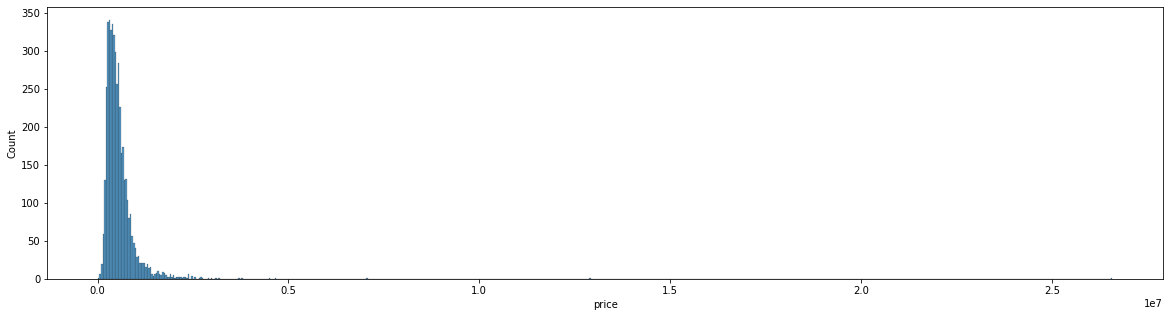

In [358]:
sns.histplot(x = data['price'])

In [122]:
# Check unique value for country. This variable only contain 1 values. This variable is ok to drop
data['country'].value_counts()

USA    4549
Name: country, dtype: int64

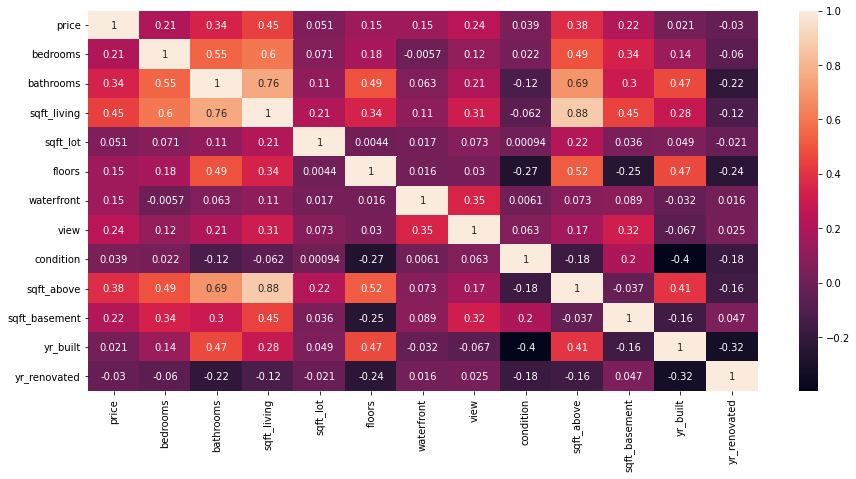

In [123]:
# Check the correlation to price. Negative correlation is ok to drop
plt.figure(figsize=(15,7))
sns.heatmap(data.corr(), annot = True)
plt.show()

# Regression Modeling

In [422]:
# Split data to X for variable input, and y for target class
X = data.drop(['date','yr_renovated','country','price'],axis=1)
y = data['price']

In [423]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [424]:
# Encode
encoder = LabelEncoder()

features = X.select_dtypes(include=['object','bool']).columns
cat = list(features.values)
for i in cat:
  X_train[i] = encoder.fit_transform(X_train[i])
  X_test[i] = encoder.fit_transform(X_test[i])

## Linear Regression

In [425]:
reg = LinearRegression()
reg.fit(X_train, y_train)

print('coef of determination training ', reg.score(X_train, y_train))
print('coef of determination testing ', reg.score(X_test, y_test))
print()
print('coefficient')
print(reg.coef_)
print()
print('intercept')
print(reg.intercept_)
print()
print('prediction')
reg_pred = reg.predict(X_test)
print(reg_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
reg_mae = reg.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, reg_mae))

coef of determination training  0.18615021449472258
coef of determination testing  0.5841046102883385

coefficient
[-6.29043784e+04  7.44178313e+04  1.64886653e+02 -6.15582940e-01
  1.30443955e+04  4.72810161e+05  5.60896376e+04  3.33706094e+04
  1.04925818e+02  5.99608347e+01 -2.43212001e+03  4.88937488e+00
  2.82211852e+03 -1.13379991e+03]

intercept
4672233.682296065

prediction
[1384342.23567401  608340.73266995  623540.32920877  479408.69151608
  538823.19449711  549401.90316108  255482.54530145  513474.33183019
  374448.48722396  720111.94481605]

real value
[1225000.0, 496752.0, 612500.0, 529950.0, 615000.0, 432000.0, 305000.0, 265000.0, 349000.0, 839000.0]

Mean Absolute Error:  164085.1856646876


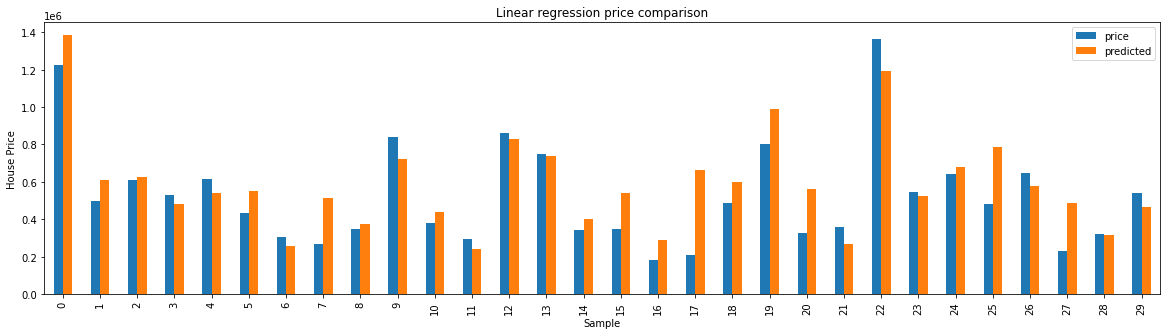

In [426]:
reg_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
reg_pred_price = pd.DataFrame(reg_pred[:30], columns = ['predicted'])
lr_result = pd.concat([reg_real_price, reg_pred_price], axis=1) 
lr_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Linear regression price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## Laso

In [427]:
las = Lasso(alpha=0.5)
las.fit(X_train, y_train)

print('coef of determination training ', las.score(X_train, y_train))
print('coef of determination testing ', las.score(X_test, y_test))
print()
print('coefficient')
print(las.coef_)
print()
print('intercept')
print(las.intercept_)
print()
print('prediction')
las_pred = las.predict(X_test)
print(las_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
laso_mae = las.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, laso_mae))

coef of determination training  0.1861502143773106
coef of determination testing  0.5841046944261656

coefficient
[-6.29037812e+04  7.44158753e+04  2.73276480e+02 -6.15587647e-01
  1.30417760e+04  4.72721851e+05  5.60919581e+04  3.33689695e+04
 -3.46200063e+00 -4.84283189e+01 -2.43211081e+03  4.88957382e+00
  2.82214494e+03 -1.13379890e+03]

intercept
4672222.6148360055

prediction
[1384344.92744481  608341.22178502  623540.47389299  479406.5412413
  538825.10941049  549399.45087435  255487.2505631   513474.92299044
  374443.99149449  720115.2557151 ]

real value
[1225000.0, 496752.0, 612500.0, 529950.0, 615000.0, 432000.0, 305000.0, 265000.0, 349000.0, 839000.0]

Mean Absolute Error:  164085.12960229127


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.700e+14, tolerance: 1.258e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


## Rigde

In [428]:
ri = Lasso(alpha=0.9,max_iter=1000)
ri.fit(X_train, y_train)

print('coef of determination training ', ri.score(X_train, y_train))
print('coef of determination testing ', ri.score(X_test, y_test))
print()
print('coefficient')
print(ri.coef_)
print()
print('intercept')
print(ri.intercept_)
print()
print('prediction')
ri_pred = ri.predict(X_test)
print(ri_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
ri_mae = ri.predict(X_train)
print('Mean Absolute Error: ',mean_absolute_error(y_train, ri_mae))

coef of determination training  0.186150214114308
coef of determination testing  0.5841047611638348

coefficient
[-6.29033034e+04  7.44143105e+04  2.73275806e+02 -6.15591412e-01
  1.30396804e+04  4.72651203e+05  5.60938145e+04  3.33676575e+04
 -3.45971914e+00 -4.84271051e+01 -2.43210346e+03  4.88973298e+00
  2.82216607e+03 -1.13379809e+03]

intercept
4672213.760867847

prediction
[1384347.08086255  608341.61307701  623540.5896403   479404.82102136
  538826.64134111  549397.48904486  255491.01477219  513475.39591855
  374440.39491076  720117.90443674]

real value
[1225000.0, 496752.0, 612500.0, 529950.0, 615000.0, 432000.0, 305000.0, 265000.0, 349000.0, 839000.0]

Mean Absolute Error:  164085.0847523681


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.700e+14, tolerance: 1.258e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


## DecissionTree

In [429]:
def get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test):
  model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, max_depth=17)
  model.fit(X_train, y_train)
  preds_val = model.predict(X_test)
  mae = mean_absolute_error(y_test, preds_val)
  return(mae)

In [430]:
for max_leaf_nodes in [10,11, 12, 13]:
    my_mae = get_mae(max_leaf_nodes, X_train, X_test, y_train, y_test)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 10  		 Mean Absolute Error:  179979
Max leaf nodes: 11  		 Mean Absolute Error:  179391
Max leaf nodes: 12  		 Mean Absolute Error:  177212
Max leaf nodes: 13  		 Mean Absolute Error:  181018


In [431]:
dt = DecisionTreeRegressor(max_depth=18,max_leaf_nodes=10)
dt.fit(X_train, y_train)

print('coef of determination training ',dt.score(X_train, y_train))
print('coef of determination testing ',dt.score(X_test, y_test))
print()
print('prediction')
dt_pred = dt.predict(X_test)
print(dt_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
dt_mae = dt.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, dt_mae))

coef of determination training  0.29832745706640607
coef of determination testing  0.39652149269726156

prediction
[1441775.77380952  412120.53718643  593064.85206853  412120.53718643
  593064.85206853  412120.53718643  412120.53718643  412120.53718643
  412120.53718643  805545.55754914]

real value
[1225000.0, 496752.0, 612500.0, 529950.0, 615000.0, 432000.0, 305000.0, 265000.0, 349000.0, 839000.0]

Mean Absolute Error:  178169.62092255126


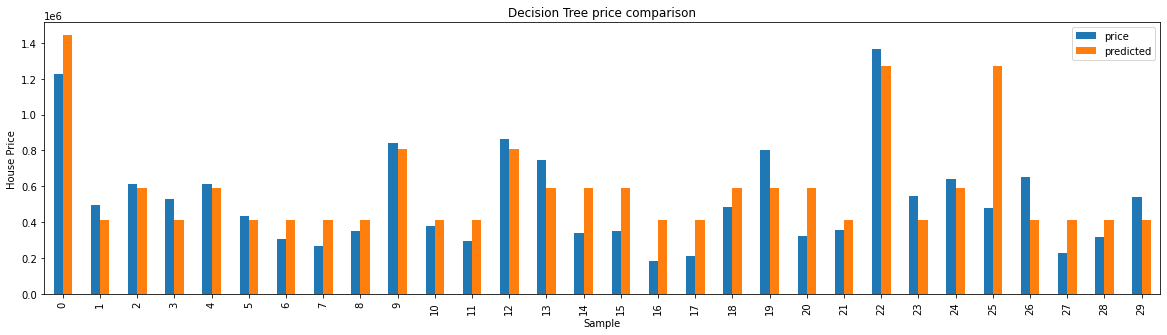

In [432]:
dt_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
dt_pred_price = pd.DataFrame(dt_pred[:30], columns = ['predicted'])
dt_result = pd.concat([dt_real_price, dt_pred_price], axis=1) 
dt_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## Random Forest

In [433]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

print('coef of determination training ',rf.score(X_train, y_train))
print('coef of determination testing ',rf.score(X_test, y_test))
print()
print('prediction')
rf_pred = rf.predict(X_test)
print(rf_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
rf_mae = rf.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, rf_mae))

coef of determination training  0.8303705712499828
coef of determination testing  0.32622976536585224

prediction
[1271398.12        500429.92555556  584671.395       453258.34538096
  509514.5         450629.95833333  487174.          419597.42666667
  495244.18        781740.9572414 ]

real value
[1225000.0, 496752.0, 612500.0, 529950.0, 615000.0, 432000.0, 305000.0, 265000.0, 349000.0, 839000.0]

Mean Absolute Error:  53936.646404743944


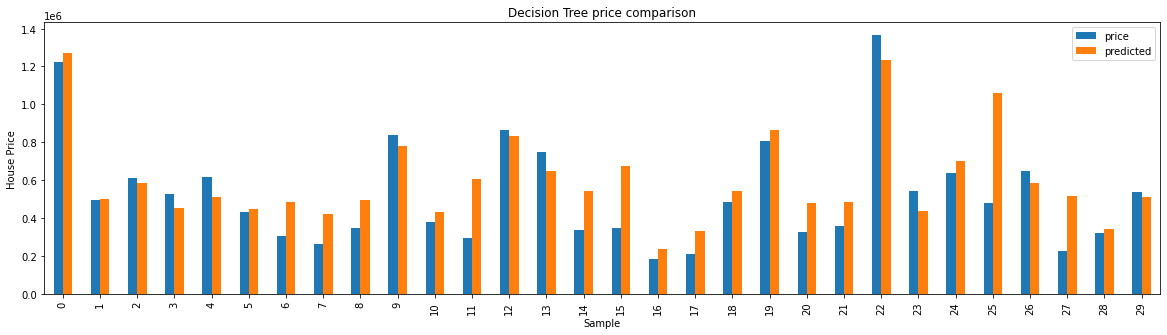

In [434]:
rf_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
rf_pred_price = pd.DataFrame(rf_pred[:30], columns = ['predicted'])
rf_result = pd.concat([rf_real_price, rf_pred_price], axis=1) 
rf_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()

## MLP Regressor

In [437]:
mlpr = MLPRegressor()
mlpr.fit(X_train, y_train)

print('coef of determination training ',mlpr.score(X_train, y_train))
print('coef of determination testing ',mlpr.score(X_test, y_test))
print()
print('prediction')
mlpr_pred = mlpr.predict(X_test)
print(mlpr_pred[:10])
print()
print('real value')
print(y_test[0:10].to_list())
print()
mlpr_mae = mlpr.predict(X_train)
print('Mean Absolute Error: ', mean_absolute_error(y_train, mlpr_mae))

coef of determination training  0.15068380108253643
coef of determination testing  0.48813029089087623

prediction
[1183572.7601715   533949.04528376  687828.88183617  376052.06020852
  605267.63616383  525996.24869888  525256.28056399  499313.49602786
  408934.15204686  668180.47221463]

real value
[1225000.0, 496752.0, 612500.0, 529950.0, 615000.0, 432000.0, 305000.0, 265000.0, 349000.0, 839000.0]

Mean Absolute Error:  184111.6556752494


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


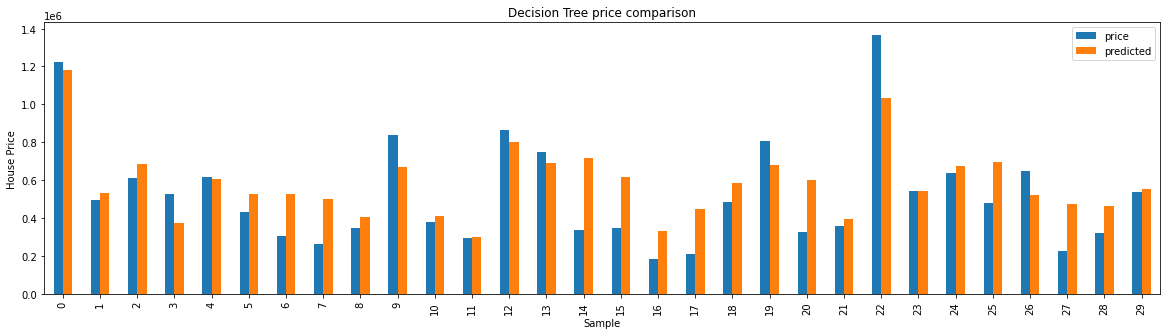

In [438]:
mlpr_real_price = pd.DataFrame(y_test[:30]).reset_index(drop=True)
mlpr_pred_price = pd.DataFrame(mlpr_pred[:30], columns = ['predicted'])
mlpr_result = pd.concat([mlpr_real_price, mlpr_pred_price], axis=1) 
mlpr_result.plot(kind='bar') 

plt.rcParams["figure.figsize"] = (20, 5)
plt.title("Decision Tree price comparison")
plt.xlabel('Sample') 
plt.ylabel('House Price') 
plt.show()